# Regressão Linear e Polinomial

**Underfitting vs. Overfitting**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

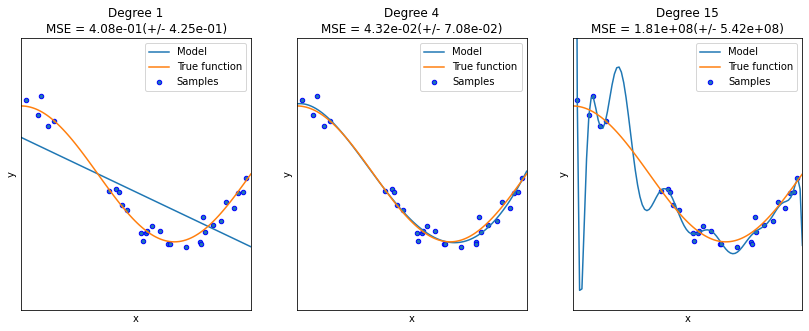

In [3]:
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

## Questão 1.

Os dados Y foram gerados usando um modelo que não pode ser representado como regressão linear. Isto é, não temos
Y = Xβ + ε. Qual o modelo que foi usado para gerar os dados Y?


**R**: Os dados foram gerados por $Y = cos(1.5\pi X) + 0.1N(0,1)$

## Questão 2.

All models are wrong. Some are useful (George Box). Não conhecendo como os dados realmente foram gerados, vamos
usar um modelo de regressão linear para aproximar os dados observados. Ajuste três modelos de regressão polinomial
com graus 1, 4 e 15.

**R**: Feito anteriormente

## Questão 3.

 O código chama a função cross val score que obtém uma estimativa para o erro de predição de NOVAS observações
usando validação cruzada. Como isto é feito? A função cross val score particiona o conjunto de dados aleatoriamente
em 5 partes iguais. Usando apenas 4 das cinco partes, ele ajusta o modelo de regressão e obtém os coeficientes estimados
βˆ. A seguir, ela prediz os valores y para os 20% dos dados que foram deixados de lado usando as suas features. Isto é,
se o i-ésimo dado foi deixado de lado no ajuste, o modelo prediz o seu valor ˆyi = x′iβˆ e compara com o valor realmente
observado para obter o erro de predição: ei = yi −yˆi. Calculamos a média desses erros de predição (ao quadrado). Seja
F o conjunto de índices dos 20% de dados que não foram usados no ajuste de regressão. Então:

$MSE =\sum_{{i}\in F}(yi − yˆi)2/(0.2n)$

A ideia é que este valor de MSE dá uma boa ideia do erro que será cometido com novos dados ainda não vistos se você
usar o modelo que você ajustou com os 80% dos dados.
Para dar mais segurança, este processo é repetido 5 vezes, deixando de fora em cada vez um dos grupos de 20% dos
dados em que os dados foram particionados. O MSE reportado é a média desses cinco diferentes valores. Existe ainda
nos plots um (± xxx) que é o desvio padrão dos cinco MSEs obtidos.

RESPONDA: Onde o erro de predição para novas observações é mínimo? Onde ele é máximo?

**R**: O erro é mínimo utilizando o modelo polinomial de grau 4. O erro máximo é utilizando um polinômio de grau 15, onde ocorre um sobreajuste ao conjunto de dados, perdendo a capacidade de generalização para novos dados.

## Questão 4.

Agora vamos observar a variação dos coeficientes estimados. Rode X = np.sort(np.random.rand(n samples)) uma
única vez. A seguir, faça um loop para gerar NSIM diferentes vetores y usando os mesmos x.
Ajuste os três modelos de regressão polinomial em cada um dos NSIM dados y e analise como os coeficientes das três
regressões variaram. Isto é, obtenha:
* Uma aproximação para E(βˆj) calculando a sua média aritmética sobre as NSIM simulações.
* Uma aproximação para V(βˆj) calculando o desvio-padrão sobre as NSIM simulações. Veja como os coeficientes do ajuste polinomial com grau 15 possuem variância grande enquanto aqueles dos coeficientes dos polinômios 1 e 4 são pequenos

In [4]:
X = np.sort(np.random.rand(n_samples))

In [56]:
NSIM = 1000
coef_d1 = np.zeros((NSIM, 1))
coef_d4 = np.zeros((NSIM, 4))
coef_d15 = np.zeros((NSIM, 15))

for i in range(NSIM):
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    
    for d in degrees:
        polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline(
            [
                ("polynomial_features", polynomial_features),
                ("linear_regression", linear_regression),
            ]
        )
        pipeline.fit(X[:, np.newaxis], y)
        coefs = pipeline['linear_regression'].coef_
        
        if d == 1:
            coef_d1[i, :] = coefs
        elif d == 4:
            coef_d4[i, :] = coefs
        elif d == 15:
            coef_d15[i, :] = coefs

In [57]:
def print_coefs_stats(coefs):
    for i in range(coefs.shape[1]):
        print(f'Coef{i+1}: mean = {coefs[:, i].mean():.2f}  std = {coefs[:, i].std():.2f}')
    print('\n')

In [58]:
print('Coeficientes para grau = 1:')
print_coefs_stats(coef_d1)

print('Coeficientes para grau = 4:')
print_coefs_stats(coef_d4)

print('Coeficientes para grau = 15:')
print_coefs_stats(coef_d15)

Coeficientes para grau = 1:
Coef1: mean = -1.96  std = 0.06


Coeficientes para grau = 4:
Coef1: mean = 2.00  std = 1.61
Coef2: mean = -23.93  std = 6.47
Coef3: mean = 32.90  std = 9.62
Coef4: mean = -11.85  std = 4.72


Coeficientes para grau = 15:
Coef1: mean = -17.92  std = 805.31
Coef2: mean = 467.47  std = 24887.17
Coef3: mean = -7123.72  std = 427935.87
Coef4: mean = 67101.69  std = 4636891.11
Coef5: mean = -429873.71  std = 33901736.61
Coef6: mean = 1963597.04  std = 174388460.27
Coef7: mean = -6583768.93  std = 647808785.99
Coef8: mean = 16477580.81  std = 1764263036.88
Coef9: mean = -30981431.20  std = 3543805453.34
Coef10: mean = 43608968.63  std = 5234509138.33
Coef11: mean = -45278946.39  std = 5609114596.24
Coef12: mean = 33646377.93  std = 4237740938.85
Coef13: mean = -16918659.50  std = 2138519611.55
Coef14: mean = 5152714.64  std = 646530743.65
Coef15: mean = -716988.59  std = 88515205.15




Realmente observa-se que os coeficientes para o modelo com grau 15 possuem uma variância muito alta, enquanto os outros possuem uma variância bem menor.

## Questão 5.

Agora, vamos estudar o problema de multicolinearidade num contexto bem simples. Gere duas features bastante correlacionadas entre si. Por exemplo, gere 100 valores i.i.d. seguindo uma U(0, 1) como x1 e os correspondets valores de x2 como
sendo xi2 = 3 + 2xi1 + ηi onde as vari´aveis η1, . . . η100 são i.i.d. com distribuição N(0, σ2 = 0.052
). A seguir gere o vetor resposta com as duas variáveis sendo importantes para determinar y. Por exemplo, Y = 10 + 3x1 + 3x2 + ε onde ε ∼ N(0, 1).

Faça um matriz de scatterplots mostrando (y, x1), (y, x2) e (x1, x2).

In [91]:
N = 100

X1 = np.random.uniform(size=N)
X2 = 3 + 2*X1 + np.random.normal(loc=0, scale=0.052, size=N)
Y = 10 + 3*X1 + 3*X2 + np.random.normal(size=N)

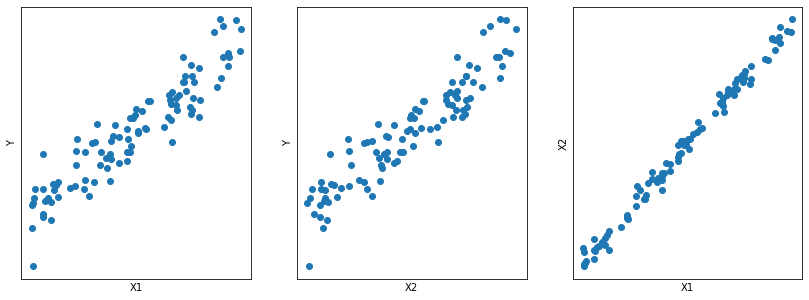

In [92]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
plt.setp(axs, xticks=(), yticks=())

axs[0].scatter(X1, Y)
axs[0].set(xlabel='X1', ylabel='Y')

axs[1].scatter (X2, Y)
axs[1].set(xlabel='X2', ylabel='Y')

axs[2].scatter(X1, X2)
axs[2].set(xlabel='X1', ylabel='X2')

plt.show()

## Questão 6.

Obtenha a correlação entre x1 e y e entre x2 e y. São muito correlacionadas, certo? Veja que a correlação é positiva:
aumento de x1 ou de x2 levam a aumento de y. Espera-se que os coeficientes da regressão de y usando ambas, x1 e x2,
sejam positivos

In [99]:
corr_x1_y = np.corrcoef(X1, Y)
print(f'Correlação entre X1 e Y: {corr_x1_y[0,1]:.4f}')

Correlação entre X1 e Y: 0.9306


In [98]:
corr_x2_y = np.corrcoef(X2, Y)
print(f'Correlação entre X2 e Y: {corr_x2_y[0,1]:.4f}')

Correlação entre X2 e Y: 0.9325


Tanto X1 quanto X2 são altamente correlacionados com Y (correlação de 0.93)

## Questão 7.

Faça o ajuste de regressão com x1 e x2.

In [111]:
X = np.concatenate((X1[:, np.newaxis], X2[:, np.newaxis]), axis=1)
X.shape

(100, 2)

In [113]:
linear_regression = LinearRegression()
linear_regression.fit(X, Y)

LinearRegression()

In [114]:
coefs = linear_regression.coef_

In [115]:
coefs

array([2.39374827, 3.40739447])

## Questão 8.

Faça um loop para repetir a análise 300 vezes: deixe x1 e x2 fixos e gere vários (300) vetores y. Para cada vetor y,
obtenha os coeficientes β1 e β2. Repita isto várias (300) vezes salvando os coeficientes em cada passo. No final, faça
um histograma dos 300 valores de β1 e outro histograma com os 300 valores de β2. Faça também um scatterplot dos
300 valores (β1, β2) obtidos em cada ajuste de regressão. Compare os resultados com o que está escrito no item 6

In [116]:
NIter = 300
coefs = np.zeros((NIter, 2))

for i in range(NIter):
    Y = 10 + 3*X1 + 3*X2 + np.random.normal(size=N)
    linear_regression = LinearRegression()
    linear_regression.fit(X, Y)
    coefs[i, :] = linear_regression.coef_

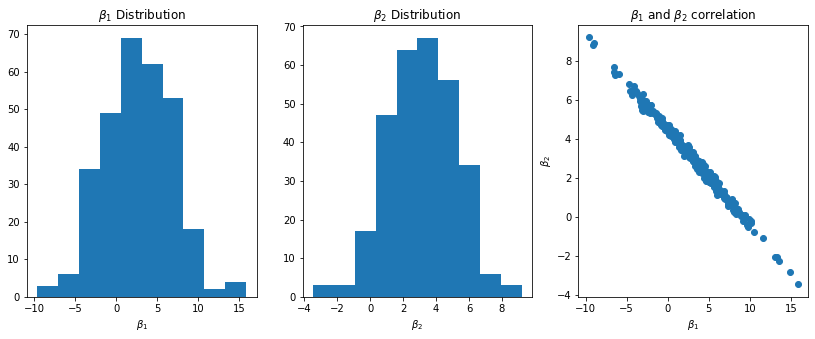

In [127]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

axs[0].hist(coefs[:, 0])
axs[0].set(xlabel='$\\beta_{{1}}$', title='$\\beta_{{1}}$ Distribution')

axs[1].hist(coefs[:, 1])
axs[1].set(xlabel='$\\beta_{{2}}$', title='$\\beta_{{2}}$ Distribution')

axs[2].scatter(coefs[:, 0], coefs[:, 1])
axs[2].set(xlabel='$\\beta_{{1}}$', ylabel='$\\beta_{{2}}$', title='$\\beta_{{1}}$ and $\\beta_{{2}}$ correlation')

plt.show()

Nem sempre os coeficientes são positivos. Como X1 e X2 são altamente correlacionados, quando um dos coeficientes é muito negativo, o outro coeficiente é colocado como positivo, para "compensar" no ajuste da função.